## Customer Analysis Project

#OVERVIEW

A well known company with numerous products needs to analyze their customer behavior and
classify them whether they will accept the campaigns held by the company. Also, cluster the
customers into different segments.
Create a model using : Train Dataset

#GOALS

The objective of this exercise is to build a model, using historical data Focus on all steps of data
science (EDA, data processing, model, evaluation, charts)

1. Highlight any trend in data, deep insight, novel steps that you take
2. Highlight next steps and improvements.
3. Apply classification and clustering machine learning algorithms and evaluate it using Test dataset.


# Data Dictionary

#People
● ID: Customer's unique identifier
● Year_Birth: Customer's birth year
● Education: Customer's education level
● Marital_Status: Customer's marital status
● Income: Customer's yearly household income
● Kidhome: Number of children in customer's household
● Teenhome: Number of teenagers in customer's household
● Dt_Customer: Date of customer's enrollment with the company
● Recency: Number of days since customer's last purchase
● Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#Products
● MntWines: Amount spent on wine in last 2 years
● MntFruits: Amount spent on fruits in last 2 years
● MntMeatProducts: Amount spent on meat in last 2 years
● MntFishProducts: Amount spent on fish in last 2 years
● MntSweetProducts: Amount spent on sweets in last 2 years
● MntGoldProds: Amount spent on gold in last 2 years

#Promotion
● NumDealsPurchases: Number of purchases made with a discount
● AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
● AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
● AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
● AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
● AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
● Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#Place
● NumWebPurchases: Number of purchases made through the company’s website
● NumCatalogPurchases: Number of purchases made using a catalogue
● NumStorePurchases: Number of purchases made directly in stores
● NumWebVisitsMonth: Number of visits to company’s website in the last month

# Problem Statement:
A well-known company with a diverse range of products is looking to gain insights into their customer behavior. They aim to classify customers based on whether they are likely to accept promotional campaigns. Additionally, they want to segment their customers into distinct groups. To achieve this, the company wants to build a data science model using their historical customer data.

# Project Goals:

1. Conduct a comprehensive exploratory data analysis (EDA) to uncover trends and gain deep insights from the data.
2. Preprocess the data, including handling missing values and encoding categorical variables.
3. Build a machine learning model for customer classification.
4. Evaluate the model's performance using a test dataset.
5. Create visualizations and charts to communicate the findings effectively.

# Key Data Points:
The dataset contains information about customers (People), their product-related behavior (Products), their response to promotions (Promotion), and their purchase channels (Place). Some of the key data points include customer demographics, purchase history, campaign acceptance, and website interactions.

# Potential Challenges:

1. Dealing with missing data and outliers in the dataset.
2. Selecting appropriate machine learning algorithms for classification and clustering.
3. Finding meaningful features or creating new ones to improve model performance.
4. Interpreting the results of customer segmentation.
5. Identifying actionable insights to help the company tailor their marketing campaigns effectively.

In [1]:
# Importing necessary libraries for data analysis and visualization.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
    
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Train Data Loading and Overview 
Loading the training dataset and gaining an initial understanding of the data.


In [2]:
df_train = pd.read_csv('customer_train.csv')  # Load the dataset

df_train.head()  # Display the first few 5 of the dataset

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df_train.tail() # Display the last 5 rows of the dataset

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,...,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,...,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,...,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,...,7,0,0,0,0,0,0,3,11,0
1679,1679,1679,8230,1980,S1,Menikah,33228000.0,1,0,23-01-2014,...,7,0,0,0,0,0,0,3,11,0


In [4]:
df_train.shape #Check the dimension of data (rows and columns counts)

(1680, 31)

In [5]:
df_train.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

In [7]:
df_train.describe() #Summary stats

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,839.500000,839.500000,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,485.118542,485.118542,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,419.750000,419.750000,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,839.500000,839.500000,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1259.250000,1259.250000,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1679.000000,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Data Preprocessing:
Various data preprocessing steps, including handling missing values, dropping columns, and data type conversions.


In [8]:
print('Columns in Data:\n', df_train.columns)  # Display column names
print('Total rows and columns in Data:\n', df_train.shape)  # Display data shape

Columns in Data:
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')
Total rows and columns in Data:
 (1680, 31)


In [9]:
# Handling missing values in the "Income" column by filling with the median
df_train["Income"].fillna(df_train["Income"].median(), inplace=True)

# Check if there are any remaining missing values
print(df_train.isnull().sum())

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [10]:
# Remove unwanted columns from the dataset
df_train = df_train.drop(labels=['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [11]:
df_train.duplicated().sum() #Identify Duplicates:

109

In [12]:
df_train = df_train.drop_duplicates() #Remove Duplicates:

In [13]:
df_train.duplicated().sum() # Check again for duplicated rows

0

# Data transformation: 

In [14]:
# Mapping values in the "Marital_Status" column to English equivalents
marital_status_mapping = {
    'Lajang': 'Single',
    'Bertunangan': 'Engaged',
    'Menikah': 'Married',
    'Cerai': 'Divorced',
    'Janda': 'Widowed(female)',
    'duda': 'Widowed (male)'}


# Replace the values in the 'Marital_Status' column
df_train['Marital_Status'] = df_train['Marital_Status'].replace(marital_status_mapping)

In [15]:
# Rename products columns with shorter names
short_product_mapping = {
    'MntCoke': 'Coke',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold',}

# Rename method to remap the columns
df_train.rename(columns=short_product_mapping, inplace=True)

In [16]:
# Renaming columns for campaign acceptance
cmp_mapping = {
    'AcceptedCmp1': 'Campaign1',
    'AcceptedCmp2': 'Campaign2',
    'AcceptedCmp3': 'Campaign3',
    'AcceptedCmp4': 'Campaign4',
    'AcceptedCmp5': 'Campaign5',}

# Rename method to remap the columns
df_train = df_train.rename(columns=cmp_mapping)

In [17]:
print('Columns in Data:\n', df_train.columns)  # Display column names
print('Total rows and columns in Data:\n', df_train.shape)  # Display data shape

Columns in Data:
 Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Coke', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Campaign3', 'Campaign4', 'Campaign5', 'Campaign1', 'Campaign2',
       'Complain', 'Response'],
      dtype='object')
Total rows and columns in Data:
 (1571, 26)


In [18]:
df_train.dtypes #check for data types of features

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
Coke                     int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Campaign3                int64
Campaign4                int64
Campaign5                int64
Campaign1                int64
Campaign2                int64
Complain                 int64
Response                 int64
dtype: object

In [19]:
import datetime

# Convert 'Dt_Customer' to datetime format
df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'], format='%d-%m-%Y')

# Calculate customer tenure in months
df_train['Cst_tenure_months'] = ((pd.to_datetime('now') - df_train['Dt_Customer']) / pd.Timedelta(days=30)).astype('int64')

# Calculate customer age based on 'Year_Birth'
current_year = datetime.datetime.now().year

df_train['Age'] = current_year - df_train['Year_Birth']

In [20]:
# Group ages into decades
def group_age_into_decades(age):
    return (age // 10) * 10

# Apply the grouping function to create a new column "Age_Group"
df_train['Age_Group'] = df_train['Year_Birth'].apply(group_age_into_decades)

In [21]:
# Drop the 'Dt_Customer' column
df_train = df_train.drop(columns=['Dt_Customer'])

# Drop the 'Year_Birth' column
df_train = df_train.drop(columns=['Year_Birth'])

df_train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group
0,S1,Single,58138000.0,0,0,58,635000,88000,546000,172000,...,0,0,0,0,0,0,1,134,66,1950
1,S1,Single,46344000.0,1,1,38,11000,1000,6000,2000,...,0,0,0,0,0,0,0,116,69,1950
2,S1,Engaged,71613000.0,0,0,26,426000,49000,127000,111000,...,0,0,0,0,0,0,0,123,58,1960
3,S1,Engaged,26646000.0,1,0,26,11000,4000,20000,10000,...,0,0,0,0,0,0,0,117,39,1980
4,S3,Married,58293000.0,1,0,94,173000,43000,118000,46000,...,0,0,0,0,0,0,0,118,42,1980


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1571 non-null   object 
 1   Marital_Status       1571 non-null   object 
 2   Income               1571 non-null   float64
 3   Kidhome              1571 non-null   int64  
 4   Teenhome             1571 non-null   int64  
 5   Recency              1571 non-null   int64  
 6   Coke                 1571 non-null   int64  
 7   Fruits               1571 non-null   int64  
 8   Meat                 1571 non-null   int64  
 9   Fish                 1571 non-null   int64  
 10  Sweets               1571 non-null   int64  
 11  Gold                 1571 non-null   int64  
 12  NumDealsPurchases    1571 non-null   int64  
 13  NumWebPurchases      1571 non-null   int64  
 14  NumCatalogPurchases  1571 non-null   int64  
 15  NumStorePurchases    1571 non-null   i

In [23]:
# Updated dataset with changes made
df_train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group
0,S1,Single,58138000.0,0,0,58,635000,88000,546000,172000,...,0,0,0,0,0,0,1,134,66,1950
1,S1,Single,46344000.0,1,1,38,11000,1000,6000,2000,...,0,0,0,0,0,0,0,116,69,1950
2,S1,Engaged,71613000.0,0,0,26,426000,49000,127000,111000,...,0,0,0,0,0,0,0,123,58,1960
3,S1,Engaged,26646000.0,1,0,26,11000,4000,20000,10000,...,0,0,0,0,0,0,0,117,39,1980
4,S3,Married,58293000.0,1,0,94,173000,43000,118000,46000,...,0,0,0,0,0,0,0,118,42,1980


In [24]:
df_train.describe()

,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,Sweets,Gold,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group
count,1.571000e+03,1571.000000,1571.000000,1571.000000,1.571000e+03,1571.000000,1.571000e+03,1571.000000,1571.000000,1571.000000,...,1571.000000,1571.000000,1571.00000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000
mean,5.195783e+07,0.457034,0.504137,48.624443,3.028109e+05,25746.658180,1.651610e+05,36532.145130,26896.880968,42774.665818,...,0.070656,0.075748,0.06620,0.061744,0.011458,0.010185,0.145767,124.045831,54.168682,1964.283896
std,2.137153e+07,0.545888,0.551040,28.971548,3.367711e+05,39449.614482,2.252443e+05,53960.926691,41674.621451,50783.355464,...,0.256330,0.264679,0.24871,0.240767,0.106459,0.100436,0.352985,6.695978,12.025406,12.236246
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,112.000000,27.000000,1890.000000
25%,3.582850e+07,0.000000,0.000000,24.000000,2.300000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,118.000000,46.000000,1960.000000
50%,5.125000e+07,0.000000,0.000000,49.000000,1.720000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,124.000000,53.000000,1970.000000
75%,6.754100e+07,1.000000,1.000000,74.000000,4.925000e+05,32000.000000,2.275000e+05,46500.000000,32000.000000,54000.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,130.000000,63.000000,1970.000000
max,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,136.000000,130.000000,1990.000000


## Exploratory Data Analysis (EDA) and visualization of various aspects of the dataset.


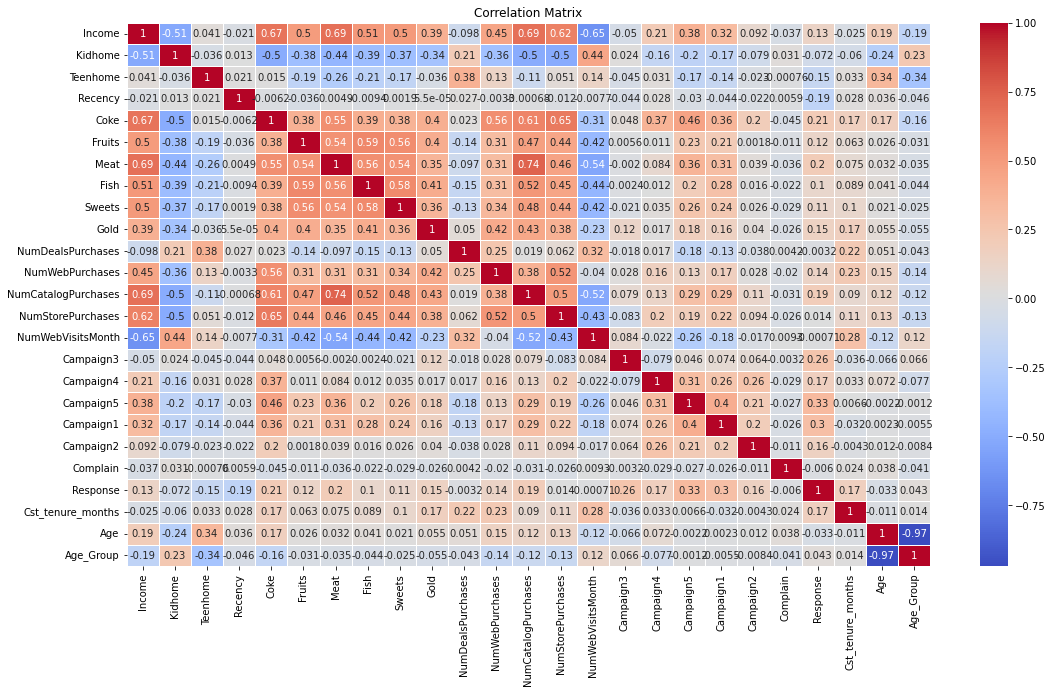

In [25]:
# Calculate the correlation matrix and visualize it using a heatmap
correlation_matrix = df_train.corr()

plt.figure(figsize=(18, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

## Customer Demographics:

- **Customer Demographics:** We have customer demographic information such as education, marital status, income, customer age, and tenure. These factors can help us understand the profile of our customers

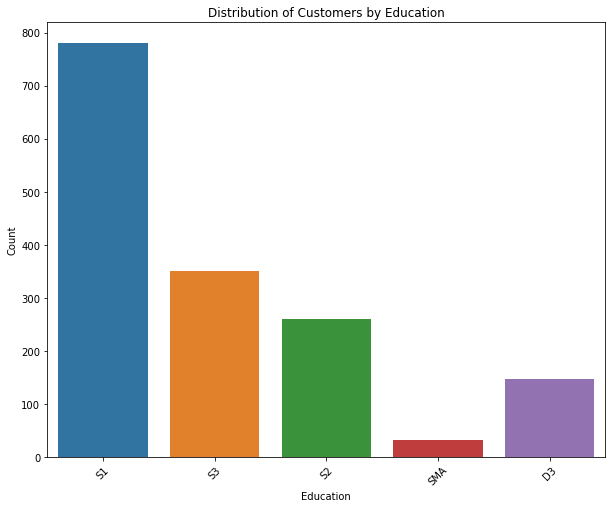

In [26]:
# Visualize the distribution of education levels
plt.figure(figsize=(10, 8))
sns.countplot(data=df_train, x='Education')

plt.title('Distribution of Customers by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

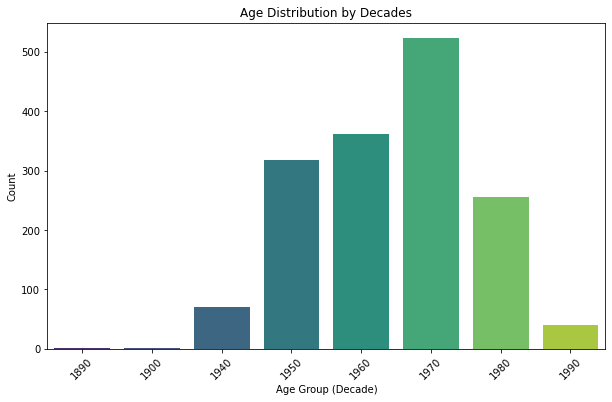

In [27]:
# Visualize the age distribution by decades
age_group_counts = df_train['Age_Group'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')

plt.xlabel('Age Group (Decade)')
plt.ylabel('Count')
plt.title('Age Distribution by Decades')
plt.xticks(rotation=45)

plt.show()

# Education levels in the dataset are denoted by Indonesian terms such as 'S1,' 'S3,' 'S2,' 'SMA,' and 'D3,' each corresponding to distinct educational milestones."

Indonesian Education Levels:

S1 (Strata 1): Equivalent to a Bachelor's degree, this is the first level of higher education (Sarjana/S1). It involves undergraduate studies.

S3 (Strata 3): Corresponds to a Doctorate or PhD (Doktor/S3), the highest academic level attainable with advanced research.

S2 (Strata 2): Represents a Master's degree (Magister/S2) acquired through postgraduate studies.

SMA (Sekolah Menengah Atas): High school or upper secondary education preparing students for further academic pursuits.

D3 (Diploma 3): A three-year diploma program at the tertiary level, offering practical training and skills development.

# Household Composition
The dataset includes the number of children (Kidhome) and teenagers (Teenhome) in customer households. We can analyze how family composition relates to customer behavior.

<Figure size 576x432 with 0 Axes>

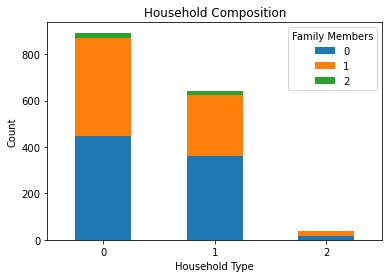

In [28]:
# Stacked Bar Chart for Kidhome and Teenhome
household_comp = df_train[['Kidhome', 'Teenhome']].value_counts().unstack()

plt.figure(figsize=(8, 6))
household_comp.plot(kind='bar', stacked=True)

plt.title('Household Composition')
plt.xlabel('Household Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Family Members', loc='upper right')

plt.show()

# Customer Spending Habits and Product Preferences

- Customer Spending Habits: The dataset contains spending data on various product categories like Coke, fruits, meat products, and more. We can investigate how different customer segments spend on these products.

- Product Preferences: By examining spending patterns, we can identify which products are most popular among customers and whether there are any seasonal trends in product purchases.

In [29]:
# Count of customers purchasing each product
prods = ['Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
count = [df_train[prod].gt(0).sum() for prod in prods]

prod_count = pd.DataFrame({'Products': prods, 'Count': count})
prod_count

,Products,Count
0,Coke,1563
1,Fruits,1282
2,Meat,1571
3,Fish,1302
4,Sweets,1274
5,Gold,1528


In [30]:
# Total amount spent on each product
spent_amt = [df_train[prod].sum() for prod in prods]

prod_amt = pd.DataFrame({'Products': prods, 'Spent Amount': spent_amt})
prod_amt

,Products,Spent Amount
0,Coke,475716000
1,Fruits,40448000
2,Meat,259468000
3,Fish,57392000
4,Sweets,42255000
5,Gold,67199000


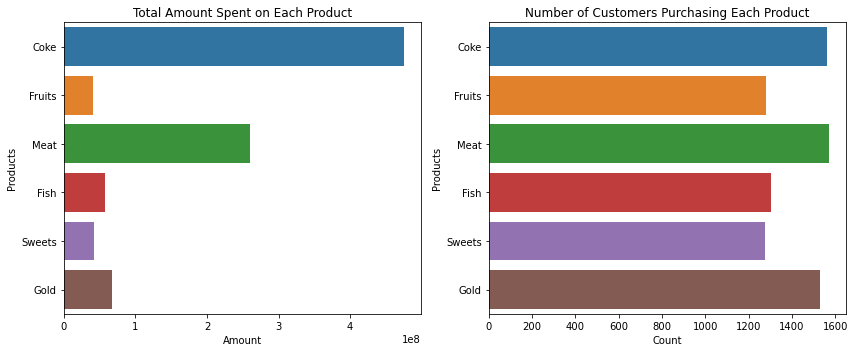

In [31]:
# Subplots for total amount spent and customer count for each product

amt = [df_train[prod].sum() for prod in prods]
count = [df_train.loc[df_train[prod] > 0, prod].size for prod in prods]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot total amount spent on each product
sns.barplot(x=amt, y=prods, ax=axes[0])
axes[0].set_title('Total Amount Spent on Each Product')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Products')

# Plot customer count for each product
sns.barplot(x=count, y=prods, ax=axes[1])
axes[1].set_title('Number of Customers Purchasing Each Product')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Products')

plt.tight_layout()
plt.show()

- Coke: Amount spent on wine in last 2 years
- Fruits: Amount spent on fruits in last 2 years
- MeatProducts: Amount spent on meat in last 2 years
- FishProducts: Amount spent on fish in last 2 years
- SweetProducts: Amount spent on sweets in last 2 years
- GoldProds: Amount spent on gold in last 2 years

### Promotion

- **Promotion Effectiveness:** The dataset includes information on campaigns (AcceptedCmp1 to AcceptedCmp5) and customer responses (Response). We can assess the effectiveness of these marketing campaigns and understand which ones resonate with customers.

In [32]:
# List of columns corresponding to campaign acceptance
campaign_columns = ['Campaign1', 'Campaign2', 'Campaign3', 'Campaign4', 'Campaign5',]

# New DataFrame with only the campaign acceptance columns
campaign_df = df_train[campaign_columns]

# Number of people who accepted each campaign
campaign_counts = campaign_df.sum()

campaign_counts

Campaign1     97
Campaign2     18
Campaign3    111
Campaign4    119
Campaign5    104
dtype: int64

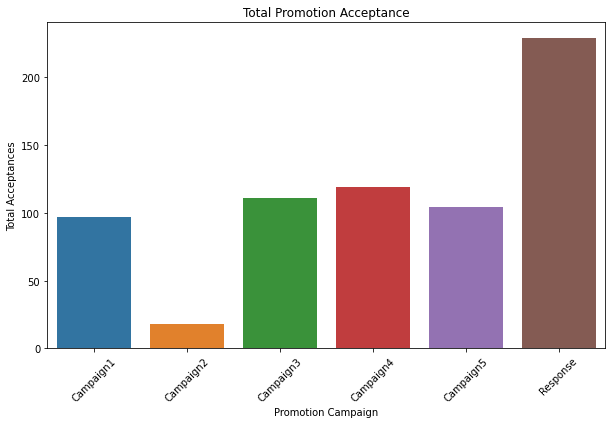

In [33]:
#Bar Chart for Promotion Acceptance

promotion_acceptance = df_train[['Campaign1', 'Campaign2', 'Campaign3', 'Campaign4', 'Campaign5', 'Response']]
promotion_counts = promotion_acceptance.sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=promotion_counts.index, y=promotion_counts.values)

plt.title('Total Promotion Acceptance')
plt.xlabel('Promotion Campaign')
plt.ylabel('Total Acceptances')
plt.xticks(rotation=45)

plt.show()

- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

In [34]:
count_positive_response = df_train['Response'].sum()
print(f"Count of customers who responded positively to the last campaign: {count_positive_response}")

Count of customers who responded positively to the last campaign: 229


## Complaints: 
We can analyze whether customer complaints (Complain) impact their responses to marketing campaigns. Do customers who complain tend to respond differently to campaigns?

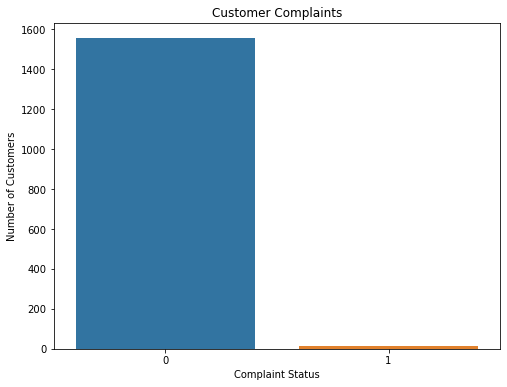

In [35]:
# Bar chart for customer complaints
complaint_counts = df_train['Complain'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=complaint_counts.index, y=complaint_counts.values)

plt.title('Customer Complaints')
plt.xlabel('Complaint Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

plt.show()

Complaints: 1 if the customer complained in the last 2 years, 0 otherwise


In [36]:
count_complain = df_train.groupby(['Complain']).size().reset_index(name='count')
print(count_complain)

count_complain = df_train['Complain'].sum()
print(f"Count of customers who complained: {count_complain}")

   Complain  count
0         0   1555
1         1     16
Count of customers who complained: 16


# Customer Recency and Campaign Acceptance
Understanding the recency of customer purchases (Recency) in relation to campaign acceptance can help us tailor marketing strategies for different customer segments.


In [37]:
# Descriptive statistics for Recency
recency_stats = df_train['Recency'].describe()[['min', 'max', 'mean', '50%']]
print(recency_stats.rename({'min': 'Minimum', 'max': 'Maximum', 'mean': 'Mean', '50%': 'Median'}))

Minimum     0.000000
Maximum    99.000000
Mean       48.624443
Median     49.000000
Name: Recency, dtype: float64


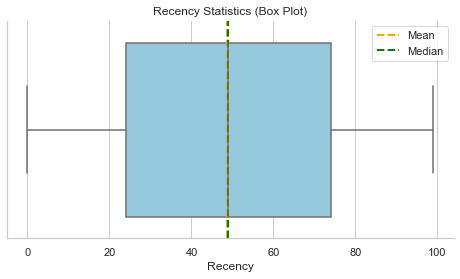

In [38]:
# Box plot for Recency
# Set the style of the plot using Seaborn
sns.set(style="whitegrid")

# Create a figure and axis with subplots
fig, ax = plt.subplots(figsize=(8, 4))

# Create a box plot with custom colors
sns.boxplot(x=df_train['Recency'], color='skyblue', ax=ax)

# Add mean and median lines
ax.axvline(df_train['Recency'].mean(), color='orange', linestyle='--', linewidth=2, label='Mean')
ax.axvline(df_train['Recency'].median(), color='green', linestyle='--', linewidth=2, label='Median')

# Set labels and title
ax.set_xlabel('Recency')
ax.set_title('Recency Statistics (Box Plot)')

# Add a legend
ax.legend(loc='best')

# Remove top and right spines
sns.despine()

# Show the plot
plt.show()

## Avg Number of Purchase by Channel
Analyzing the average number of purchases by different channels.


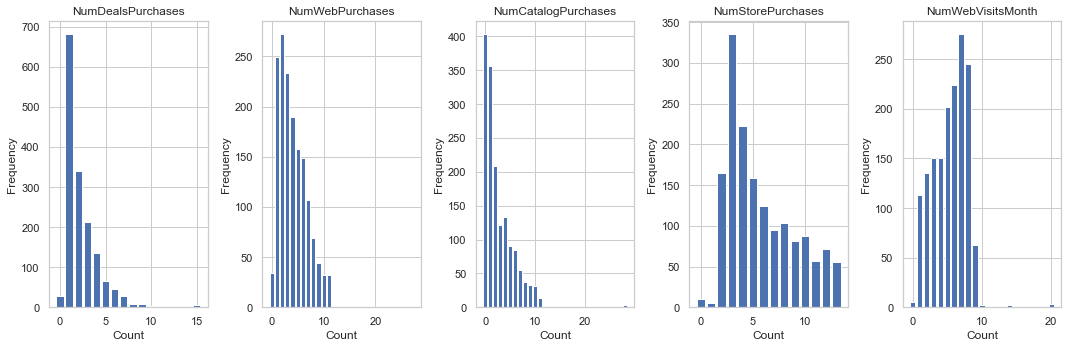

In [39]:
# List of columns to visualize
columns_to_visualize = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_visualize), figsize=(15, 5))

# Bar charts for each column
for i, column_name in enumerate(columns_to_visualize):
    ax = axes[i]
    ax.bar(df_train[column_name].value_counts().index, df_train[column_name].value_counts().values)
    ax.set_title(column_name)
    ax.set_xlabel('Count')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [40]:
# Calculate the total number of occurrences for each column
total_counts = df_train[columns_to_visualize].sum()

# Create a DataFrame to display the total counts
total_counts_df = pd.DataFrame({'Column Name': total_counts.index, 'Total Count': total_counts.values})

# Display the total counts
print(total_counts_df)

           Column Name  Total Count
0    NumDealsPurchases         3701
1      NumWebPurchases         6335
2  NumCatalogPurchases         4173
3    NumStorePurchases         9072
4    NumWebVisitsMonth         8383


# Checking Income and Age columns to know the Skewness

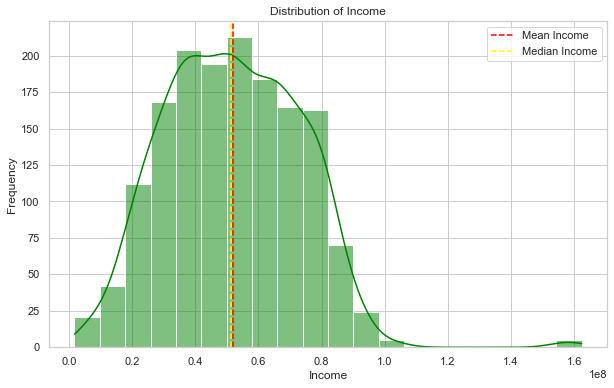

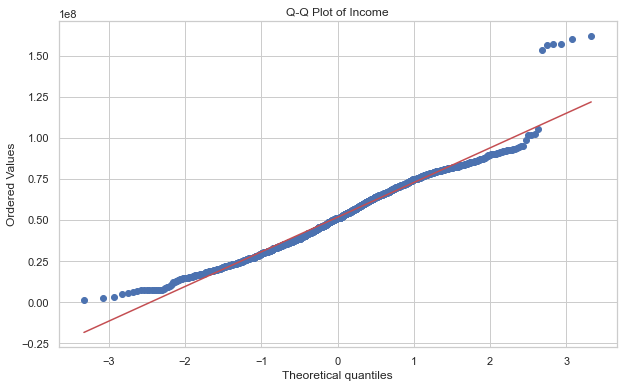

In [41]:
# Histogram and Q-Q plot for Income
import scipy.stats as stats

# Plot histogram of Income
plt.figure(figsize=(10, 6))

sns.histplot(df_train['Income'], kde=True, bins=20, color='green')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.grid(True)

# Add statistics to the plot
plt.axvline(x=np.mean(df_train['Income']), color='red', linestyle='--', label='Mean Income')
plt.axvline(x=np.median(df_train['Income']), color='yellow', linestyle='--', label='Median Income')
plt.legend()

# Create a probability plot (Q-Q plot) to check for normality
plt.figure(figsize=(10, 6))
stats.probplot(df_train['Income'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Income')
plt.show()

the "Income" variable is right-skewed (positively skewed), applying a log transformation can help make the distribution more symmetric and may improve the performance of certain classification algorithms. This is because some algorithms assume that the features follow a roughly Gaussian (normal) distribution, and a log transformation can bring the data closer to this assumption.

Retaining high-income customers is essential to preserve data integrity, gain insights into diverse customer behavior, and align with our business strategy for targeted campaigns and customer engagement, making their exclusion unnecessary.

In [42]:
# Retaining the "Income" variable with the log transformation 
df_train['Log_Income'] = np.log1p(df_train['Income'])

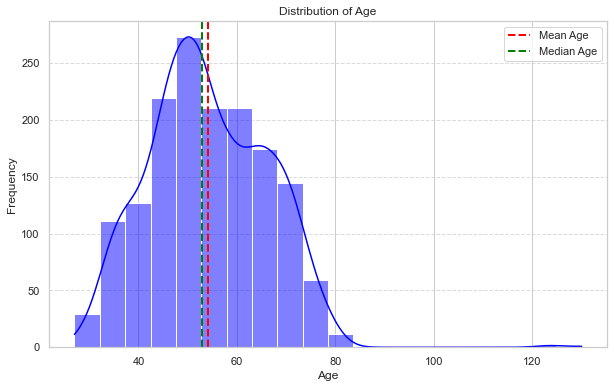

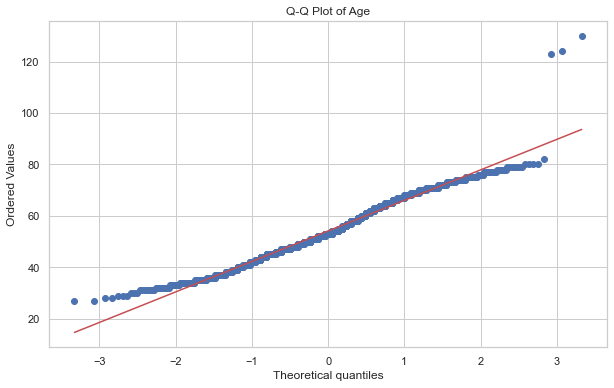

In [43]:
# Plot histogram of Age
plt.figure(figsize=(10, 6))

sns.histplot(data=df_train, x='Age', kde=True, color='blue', bins=20)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Customize grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add vertical lines for mean and median
mean_age = df_train['Age'].mean()
median_age = df_train['Age'].median()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Mean Age')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label='Median Age')

# Add legend
plt.legend()

# Create a probability plot (Q-Q plot) to check for normality
plt.figure(figsize=(10, 6))

stats.probplot(df_train['Age'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Age')

plt.show()

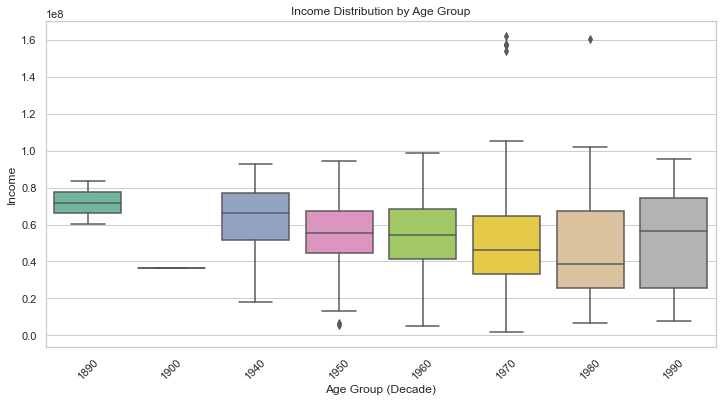

In [44]:
# Box plot for Income distribution by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Group', y='Income', data=df_train, palette='Set2')

plt.xlabel('Age Group (Decade)')
plt.ylabel('Income')
plt.title('Income Distribution by Age Group')
plt.xticks(rotation=45)

plt.show()

# IQR Method
Q1 = .25 of data Q3 = .75 of data

IQR = Q3 - Q1

Upper Limit = Q3 + (1.5*IQR)

Lower Limit = Q1 - (1.5*IQR)

In [45]:
# Outlier detection using the IQR method
Q1 = df_train['Age'].quantile(0.25)
Q3 = df_train['Age'].quantile(0.75)

IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [46]:
# Filter the dataset to keep only the rows within the specified bounds
df_outliers = df_train[(df_train['Age'] <= lower_bound) | (df_train['Age'] >= upper_bound)]

# Now 'df_filtered' contains the dataset with outliers removed from the Age column
df_outliers.shape

(3, 28)

In [47]:
df_filtered = df_train[(df_train['Age'] >= lower_bound) & (df_train['Age'] <= upper_bound)]
df_filtered.shape

(1568, 28)

In [48]:
# Old Data and New Data

print('Old Data with Outlier:', len(df_train))
print('New Data without Outlier:',len(df_filtered))
print ('Total Outliers:', len(df_outliers))

Old Data with Outlier: 1571
New Data without Outlier: 1568
Total Outliers: 3


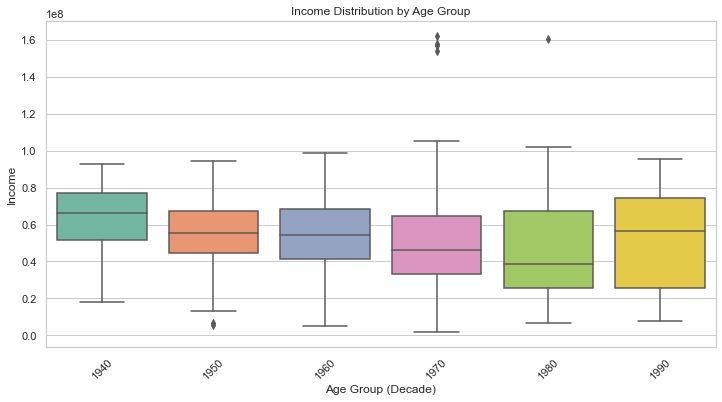

In [49]:
# Box plot to visualize income distribution by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Group', y='Income', data=df_filtered, palette='Set2')

plt.xlabel('Age Group (Decade)')
plt.ylabel('Income')
plt.title('Income Distribution by Age Group')
plt.xticks(rotation=45)

plt.show()

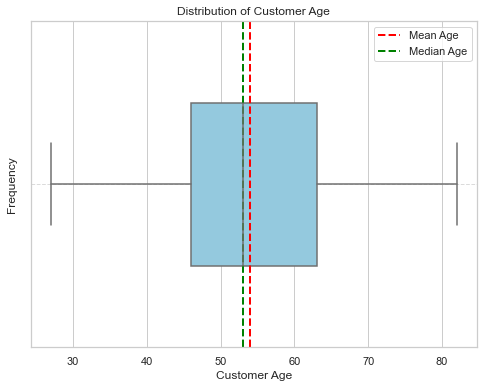

In [50]:
# Boxplot with customizations
plt.figure(figsize=(8, 6))

sns.boxplot(x=df_filtered['Age'], color='skyblue', width=0.5)

plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add mean and median lines
mean_age = df_filtered['Age'].mean()
median_age = df_filtered['Age'].median()

plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Mean Age')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label='Median Age')

# Add labels and legend
plt.ylabel('Frequency')
plt.legend()

plt.show()

## Encoding categorical columns

In [51]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder for 'Education' column
education_encoder = LabelEncoder()
df_filtered['Education'] = education_encoder.fit_transform(df_filtered['Education'])

# Create a label encoder for 'Marital_Status' column
marital_status_encoder = LabelEncoder()
df_filtered['Marital_Status'] = marital_status_encoder.fit_transform(df_filtered['Marital_Status'])

# Convert the encoded columns to int64 data type
df_filtered[['Education', 'Marital_Status']] = df_filtered[['Education', 'Marital_Status']].astype('int64')

In [52]:
df_filtered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group,Log_Income
0,1,4,58138000.0,0,0,58,635000,88000,546000,172000,...,0,0,0,0,0,1,134,66,1950,17.878330
1,1,4,46344000.0,1,1,38,11000,1000,6000,2000,...,0,0,0,0,0,0,116,69,1950,17.651602
2,1,2,71613000.0,0,0,26,426000,49000,127000,111000,...,0,0,0,0,0,0,123,58,1960,18.086787
3,1,2,26646000.0,1,0,26,11000,4000,20000,10000,...,0,0,0,0,0,0,117,39,1980,17.098150
4,3,3,58293000.0,1,0,94,173000,43000,118000,46000,...,0,0,0,0,0,0,118,42,1980,17.880993


In [53]:
df_filtered.tail()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group,Log_Income
1675,0,2,20193000.0,0,0,18,8000,8000,22000,24000,...,0,0,0,0,0,0,132,32,1990,16.820847
1676,1,3,27573000.0,1,0,45,50000,15000,110000,39000,...,0,0,0,0,0,0,128,48,1970,17.132348
1677,4,4,15862000.0,1,0,26,1000,1000,4000,11000,...,0,0,0,0,0,0,125,44,1970,16.579437
1678,3,3,49544000.0,1,0,0,308000,0,73000,0,...,0,0,0,0,0,0,129,47,1970,17.718372
1679,1,3,33228000.0,1,0,28,22000,2000,31000,7000,...,0,0,0,0,0,0,118,43,1980,17.318903


In [54]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 1679
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1568 non-null   int64  
 1   Marital_Status       1568 non-null   int64  
 2   Income               1568 non-null   float64
 3   Kidhome              1568 non-null   int64  
 4   Teenhome             1568 non-null   int64  
 5   Recency              1568 non-null   int64  
 6   Coke                 1568 non-null   int64  
 7   Fruits               1568 non-null   int64  
 8   Meat                 1568 non-null   int64  
 9   Fish                 1568 non-null   int64  
 10  Sweets               1568 non-null   int64  
 11  Gold                 1568 non-null   int64  
 12  NumDealsPurchases    1568 non-null   int64  
 13  NumWebPurchases      1568 non-null   int64  
 14  NumCatalogPurchases  1568 non-null   int64  
 15  NumStorePurchases    1568 non-null   i

In [55]:
# Summary statistics.
df_filtered.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group,Log_Income
count,1568.000000,1568.000000,1.568000e+03,1568.000000,1568.000000,1568.000000,1.568000e+03,1568.000000,1.568000e+03,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.00000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1.582908,2.706633,5.194221e+07,0.457270,0.504464,48.616709,3.028941e+05,25700.255102,1.651103e+05,36526.785714,...,0.075893,0.065689,0.061862,0.01148,0.009566,0.146046,124.056122,54.031888,1964.419643,17.661910
std,1.000709,1.211267,2.137259e+07,0.545994,0.551131,28.962342,3.367389e+05,39365.639262,2.251654e+05,53975.347578,...,0.264911,0.247816,0.240982,0.10656,0.097370,0.353265,6.696686,11.621680,11.845417,0.498744
min,0.000000,0.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,112.000000,27.000000,1940.000000,14.363633
25%,1.000000,2.000000,3.579550e+07,0.000000,0.000000,24.000000,2.300000e+04,1000.000000,1.600000e+04,3000.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,118.000000,46.000000,1960.000000,17.393333
50%,1.000000,3.000000,5.125000e+07,0.000000,0.000000,49.000000,1.720000e+05,8000.000000,6.700000e+04,12000.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,124.000000,53.000000,1970.000000,17.752226
75%,2.000000,3.250000,6.753850e+07,1.000000,1.000000,74.000000,4.922500e+05,32000.000000,2.272500e+05,46250.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,130.000000,63.000000,1970.000000,18.028208
max,4.000000,5.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,136.000000,82.000000,1990.000000,18.905555


# Overall feature distribution visual

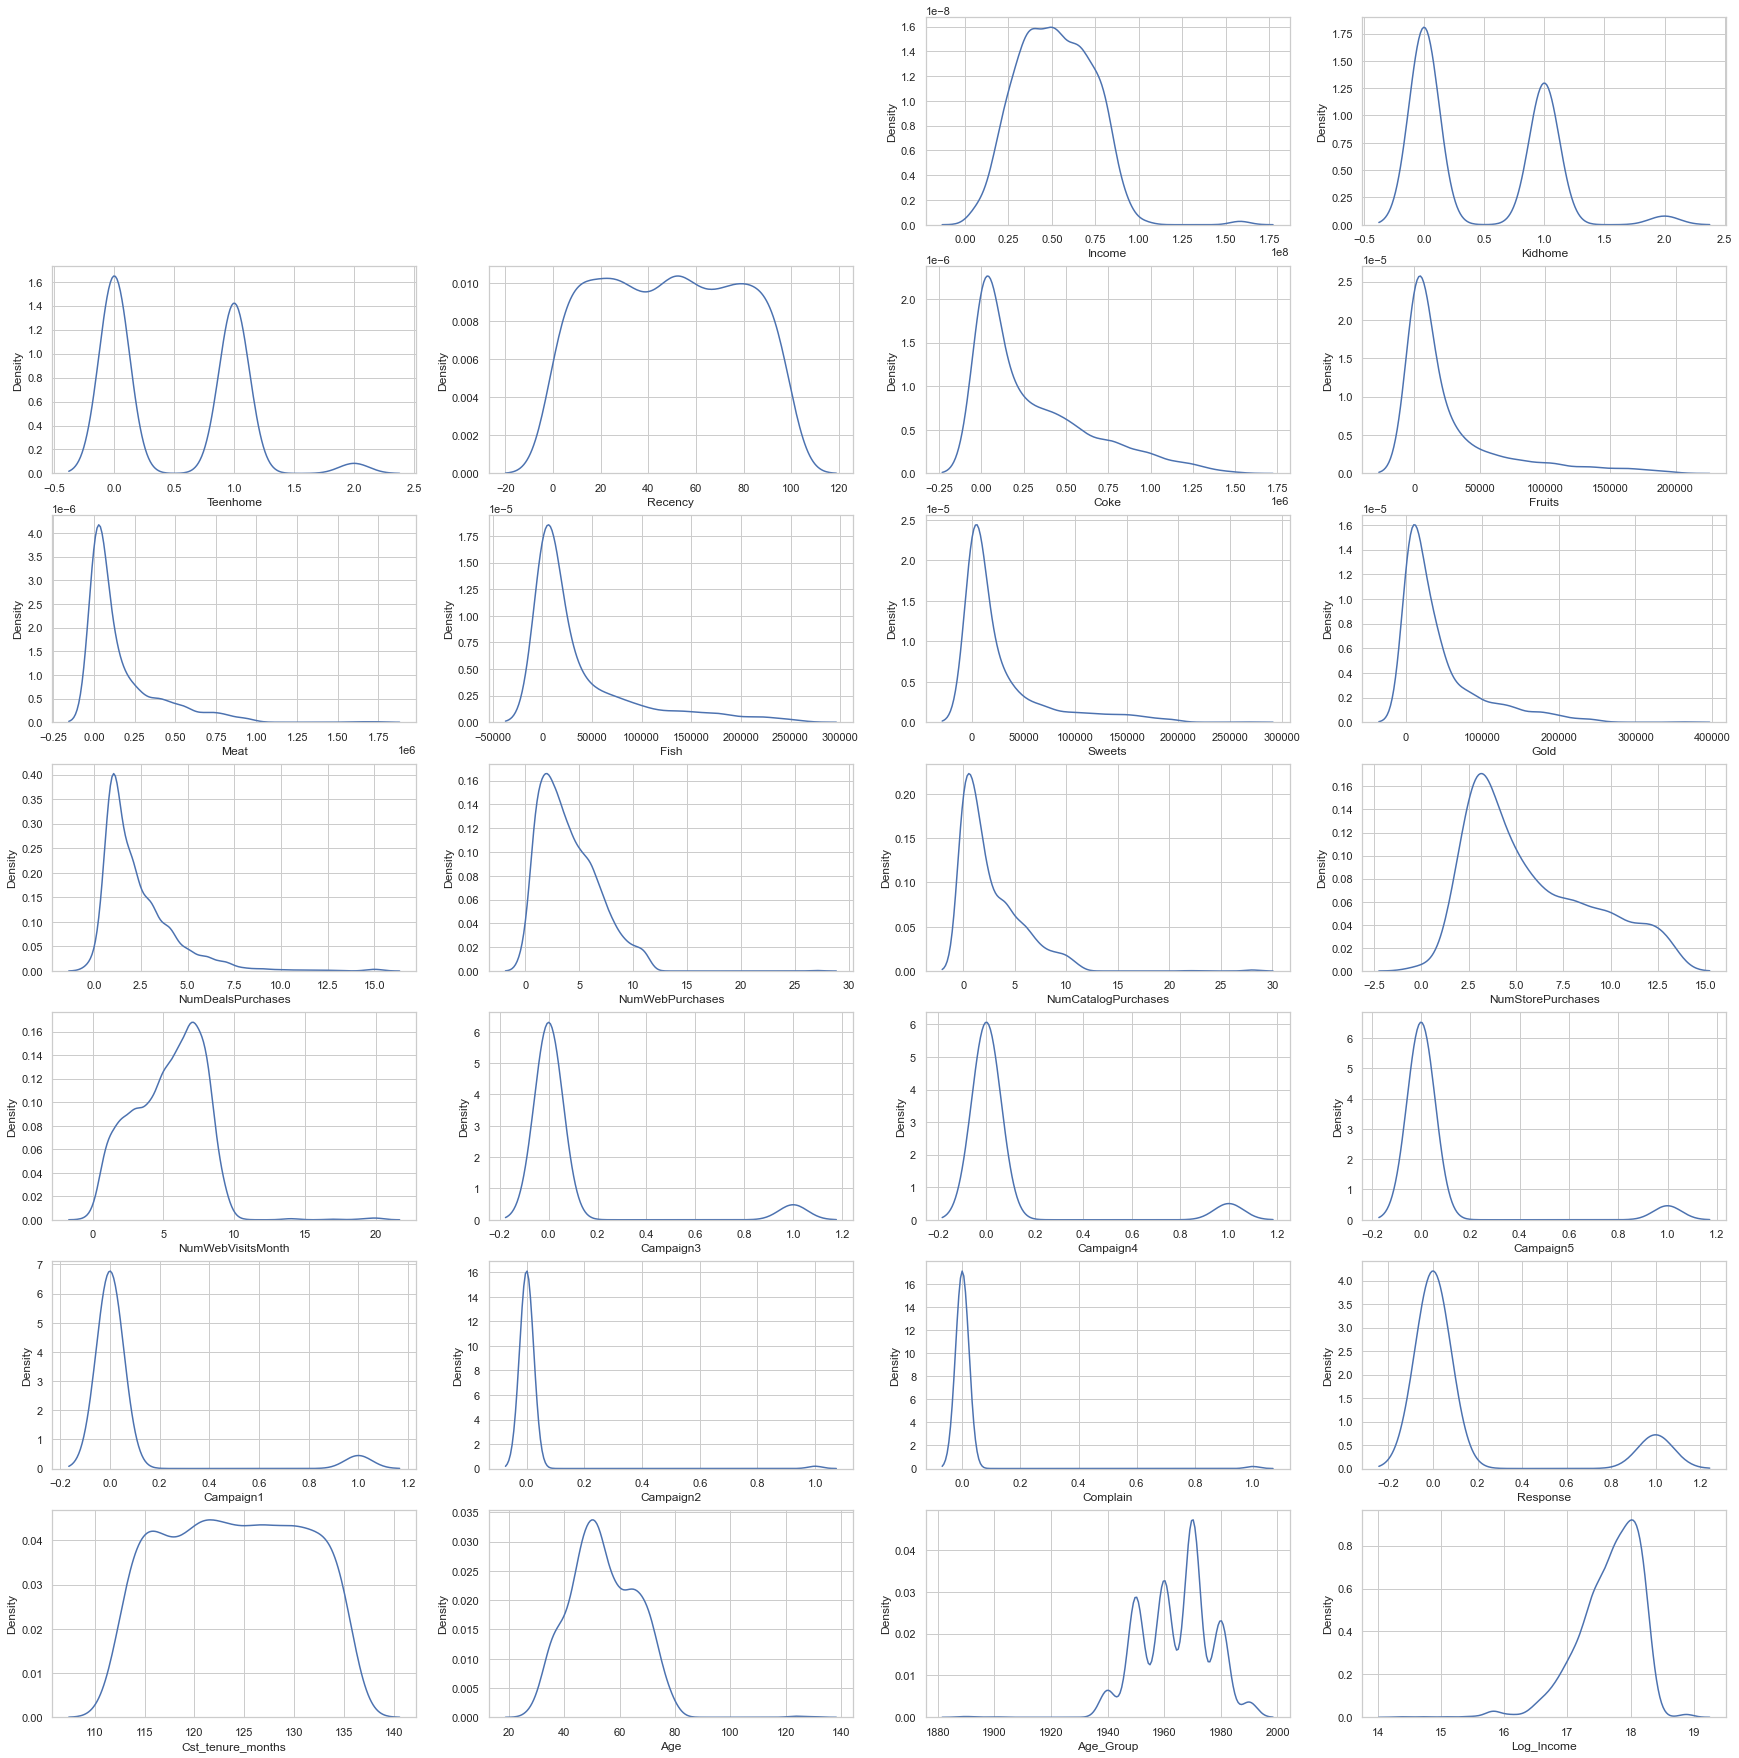

In [56]:
# Create a figure with a specified size (20 units wide and 10 units tall).
plt.figure(figsize=(30, 45))

# Loop through each column in the DataFrame.
for i, col in enumerate(df_filtered.columns):
    # Check if the column's data type is not 'object' (i.e., numeric).
    if df_train[col].dtype != 'object':
        # Create a subplot in a 6x4 grid layout and position it using 'i + 1'.
        ax = plt.subplot(10, 4, i + 1)
        
        # Plot the Kernel Density Estimate (KDE) for the current column.
        sns.kdeplot(df_train[col], ax=ax)
        
        # Set the x-axis label to the column name.
        plt.xlabel(col)

# Display the entire figure with subplots.
plt.show()

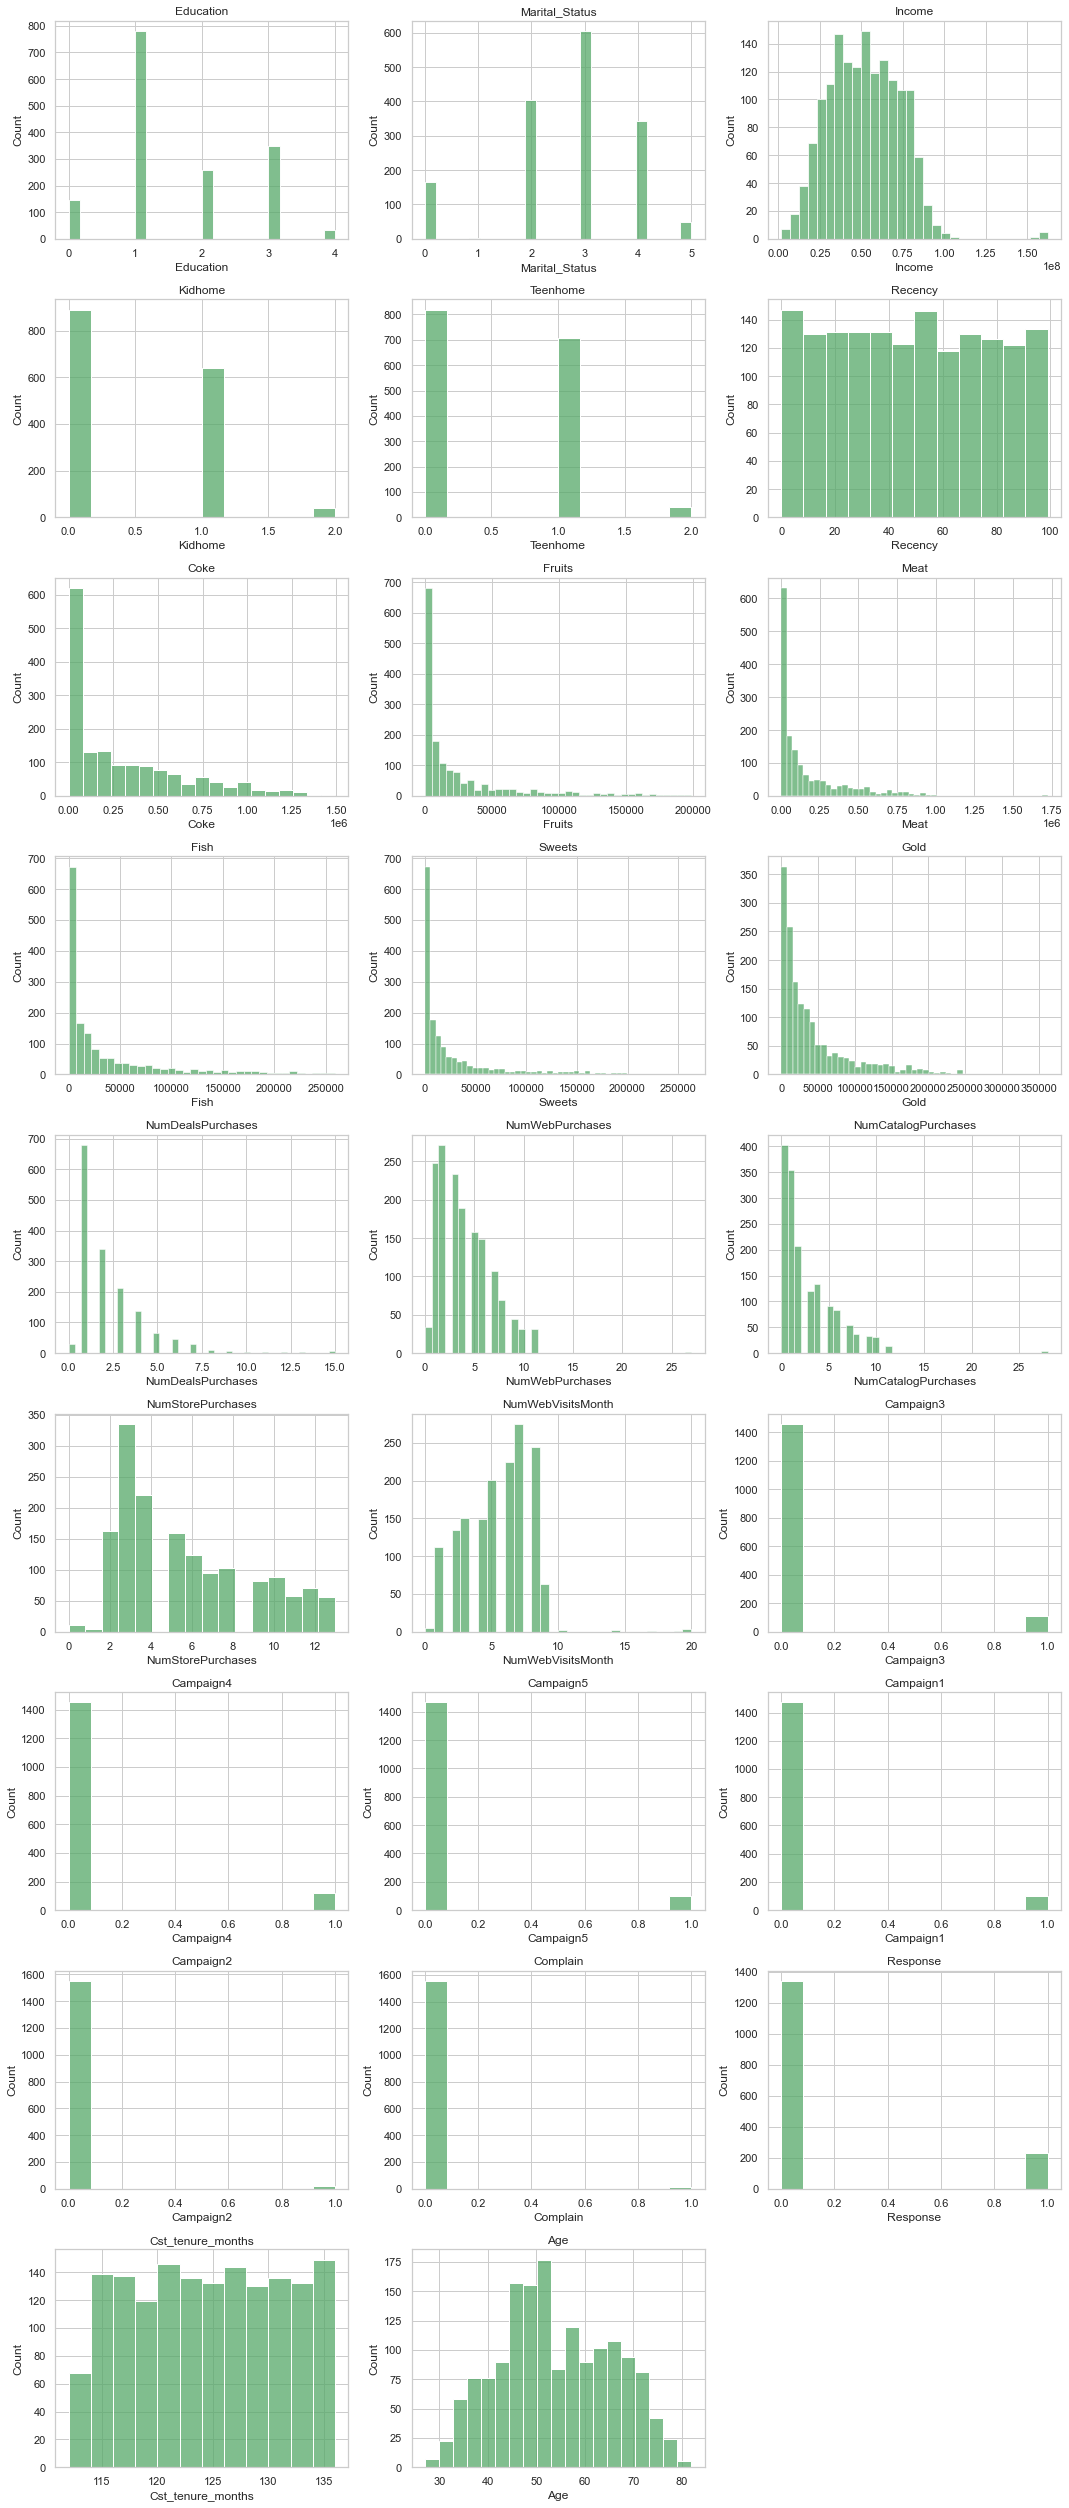

In [57]:
# Calculate the number of rows and columns for subplots
n_columns = 3  # Number of subplots per line
n_rows = (26 + 1) // n_columns  # Calculate the number of lines

plt.figure(figsize=(15, 35))  

for i in range(0, 26):
    plt.subplot(n_rows, n_columns, i + 1)
    sns.histplot(df_filtered[df_train.columns[i]], kde_kws={'color': 'b', 'bw': 0.1, 'lw': 3, 'label': 'KDE'}, color='g')
    plt.title(df_train.columns[i])

plt.tight_layout()
plt.show()

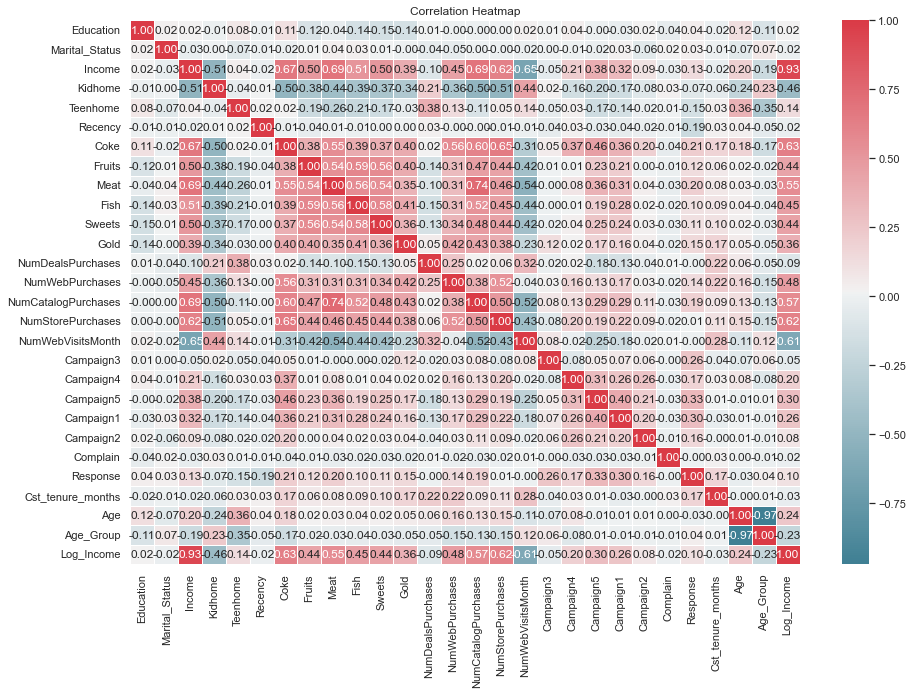

In [58]:
# Set a larger figure size
plt.figure(figsize=(15, 10))

# Generate a correlation matrix
correlation_matrix = df_filtered.corr()

# Define a custom color map (e.g., 'coolwarm', 'viridis', 'RdBu_r')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap with annotations and custom color map
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, cbar=True, linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [59]:
df_filtered.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign3', 'Campaign4',
       'Campaign5', 'Campaign1', 'Campaign2', 'Complain', 'Response',
       'Cst_tenure_months', 'Age', 'Age_Group', 'Log_Income'],
      dtype='object')

In [60]:
df_filtered.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group,Log_Income
count,1568.000000,1568.000000,1.568000e+03,1568.000000,1568.000000,1568.000000,1.568000e+03,1568.000000,1.568000e+03,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.00000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1.582908,2.706633,5.194221e+07,0.457270,0.504464,48.616709,3.028941e+05,25700.255102,1.651103e+05,36526.785714,...,0.075893,0.065689,0.061862,0.01148,0.009566,0.146046,124.056122,54.031888,1964.419643,17.661910
std,1.000709,1.211267,2.137259e+07,0.545994,0.551131,28.962342,3.367389e+05,39365.639262,2.251654e+05,53975.347578,...,0.264911,0.247816,0.240982,0.10656,0.097370,0.353265,6.696686,11.621680,11.845417,0.498744
min,0.000000,0.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,112.000000,27.000000,1940.000000,14.363633
25%,1.000000,2.000000,3.579550e+07,0.000000,0.000000,24.000000,2.300000e+04,1000.000000,1.600000e+04,3000.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,118.000000,46.000000,1960.000000,17.393333
50%,1.000000,3.000000,5.125000e+07,0.000000,0.000000,49.000000,1.720000e+05,8000.000000,6.700000e+04,12000.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,124.000000,53.000000,1970.000000,17.752226
75%,2.000000,3.250000,6.753850e+07,1.000000,1.000000,74.000000,4.922500e+05,32000.000000,2.272500e+05,46250.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,130.000000,63.000000,1970.000000,18.028208
max,4.000000,5.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,136.000000,82.000000,1990.000000,18.905555


In [61]:
df_filtered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group,Log_Income
0,1,4,58138000.0,0,0,58,635000,88000,546000,172000,...,0,0,0,0,0,1,134,66,1950,17.878330
1,1,4,46344000.0,1,1,38,11000,1000,6000,2000,...,0,0,0,0,0,0,116,69,1950,17.651602
2,1,2,71613000.0,0,0,26,426000,49000,127000,111000,...,0,0,0,0,0,0,123,58,1960,18.086787
3,1,2,26646000.0,1,0,26,11000,4000,20000,10000,...,0,0,0,0,0,0,117,39,1980,17.098150
4,3,3,58293000.0,1,0,94,173000,43000,118000,46000,...,0,0,0,0,0,0,118,42,1980,17.880993


# Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

# Splitting into features (X) and target variable (y)
X = df_filtered.drop(columns=['Response'])  # Features
y = df_filtered['Response']  # Target variable

In [63]:
# Splitting into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape

(1254, 27)

In [65]:
X_train.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign3', 'Campaign4',
       'Campaign5', 'Campaign1', 'Campaign2', 'Complain', 'Cst_tenure_months',
       'Age', 'Age_Group', 'Log_Income'],
      dtype='object')

In [66]:
X.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign3', 'Campaign4',
       'Campaign5', 'Campaign1', 'Campaign2', 'Complain', 'Cst_tenure_months',
       'Age', 'Age_Group', 'Log_Income'],
      dtype='object')

In [67]:
X.shape

(1568, 27)

In [68]:
df_filtered.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign3', 'Campaign4',
       'Campaign5', 'Campaign1', 'Campaign2', 'Complain', 'Response',
       'Cst_tenure_months', 'Age', 'Age_Group', 'Log_Income'],
      dtype='object')

# Training and Predicting

In [69]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

In [70]:
# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8407643312101911


In [73]:
# Import the necessary libraries
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[260,   8],
       [ 42,   4]], dtype=int64)

Confusion Matrix:

- True Positives (TP): 4
- True Negatives (TN): 260
- False Positives (FP): 8
- False Negatives (FN): 42


In [74]:
# Import the necessary libraries
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       268
           1       0.33      0.09      0.14        46

    accuracy                           0.84       314
   macro avg       0.60      0.53      0.53       314
weighted avg       0.78      0.84      0.80       314



Classification Report:

- Precision for class 0 (Negative Class): 0.86
    : Out of all instances predicted as class 0, 86% were actually class 0.
- Precision for class 1 (Positive Class): 0.33
   : Out of all instances predicted as class 1, only 33% were actually class 1.
- Recall (Sensitivity) for class 0: 0.97
   : Out of all actual class 0 instances, the model correctly identified 97%.
- Recall (Sensitivity) for class 1: 0.09
   : Out of all actual class 1 instances, the model correctly identified only 9%.
- F1-Score for class 0: 0.91
   : The harmonic mean of precision and recall for class 0.
- F1-Score for class 1: 0.14
   : The harmonic mean of precision and recall for class 1.



In [75]:
# Import the necessary libraries
from sklearn.metrics import f1_score

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)
f1

0.13793103448275862

- F1-Score (Weighted): 0.138 : The weighted average of the F1-scores for both classes. It considers class imbalance.

In [76]:
# Import the necessary libraries
from sklearn.metrics import precision_score

# Calculate the precision score
precision = precision_score(y_test, y_pred)
precision

0.3333333333333333

- Precision (Weighted): 0.333: The weighted average of the precision scores for both classes. It considers class imbalance.

In [77]:
# Import the necessary libraries
from sklearn.metrics import recall_score

# Calculate the recall score
recall = recall_score(y_test, y_pred)
recall

0.08695652173913043

- Recall (Weighted): 0.087: The weighted average of the recall scores for both classes. It considers class imbalance.

# Import Test Data

In [95]:
# Load the preprocessed test data
df_test_data = pd.read_csv("preprocessed_test_data.csv")

df_test_data.shape

(550, 28)

In [97]:
test_data = df_test_data.drop(columns=['Response'])

test_data.shape

(550, 27)

In [98]:
X_train.shape

(1254, 27)

In [100]:
y_pred_test = model.predict(test_data)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [101]:
y_true = df_test_data['Response']

accuracy = accuracy_score(y_true, y_pred_test)
precision = precision_score(y_true, y_pred_test)
recall = recall_score(y_true, y_pred_test)
f1 = f1_score(y_true, y_pred_test)
confusion = confusion_matrix(y_true, y_pred_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8472727272727273
Precision: 0.625
Recall: 0.11363636363636363
F1 Score: 0.1923076923076923
Confusion Matrix:
[[456   6]
 [ 78  10]]


# Scaling the DataFrame

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df_train = pd.DataFrame(scaler.fit_transform(df_filtered), columns=df_filtered.columns)

scaled_df_train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group,Log_Income
0,-0.582681,1.068121,0.289987,-0.837768,-0.915618,0.324086,0.986556,1.583097,1.692139,2.510710,...,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,2.418090,1.485369,1.030138,-1.217707,0.434069
1,-0.582681,1.068121,-0.262018,0.994339,0.899412,-0.366686,-0.867103,-0.627657,-0.706863,-0.639881,...,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-1.203385,1.288358,-1.217707,-0.020674
2,-0.582681,-0.583569,0.920668,-0.837768,-0.915618,-0.781150,0.365699,0.592069,-0.169309,1.380204,...,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-0.157759,0.341549,-0.373229,0.852166
3,-0.582681,-0.583569,-1.183960,0.994339,-0.915618,-0.781150,-0.867103,-0.551425,-0.644667,-0.491618,...,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-1.054010,-1.293848,1.315726,-1.130721
4,1.416540,0.242276,0.297241,0.994339,-0.915618,1.567476,-0.385864,0.439603,-0.209292,0.175566,...,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-0.904635,-1.035627,1.315726,0.439409


## Finding 'k' value by Elbow Method

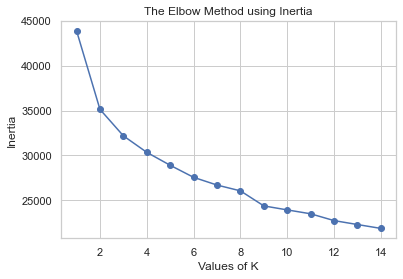

In [106]:
from sklearn.cluster import KMeans
 
# Initialize the range of cluster values (K)
range_val = range(1, 15)

# Create an empty list to store the inertia values
inertia = []

# Loop through different values of K
for i in range_val:
    # Create a KMeans model with 'i' clusters
    kmeans = KMeans(n_clusters=i)
    
    # Fit and predict using the scaled dataset
    kmeans.fit_predict(scaled_df_train)
    
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range_val, inertia, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

plt.show()

In [107]:
km = KMeans(n_clusters = 4)
y_predicted = km.fit_predict(scaled_df_train)
y_predicted

array([1, 2, 1, ..., 2, 2, 2])

In [108]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(scaled_df_train, y_predicted)
silhouette_avg

0.1495297158058896

In [116]:
from sklearn.manifold import TSNE


In [117]:
tsne = TSNE(n_components=2, perplexity=35, n_iter=300, random_state=42)
df_tsne = tsne.fit_transform(scaled_df_train)
    
df_tsne

array([[  9.350755 ,  -0.7898482],
       [ -3.4091704,   1.9330204],
       [  8.847263 ,   1.1130825],
       ...,
       [-20.106886 ,   1.54939  ],
       [-11.5949   ,  -2.7432282],
       [-15.300357 ,   4.443942 ]], dtype=float32)

In [118]:
df_tsne.shape

(1568, 2)

In [119]:
df_tsne = pd.DataFrame(data=df_tsne, columns=['component 1', 'component 2'])
df_tsne.head()

,component 1,component 2
0,9.350755,-0.789848
1,-3.409170,1.933020
2,8.847263,1.113083
3,-15.830201,4.203455
4,-11.350948,-1.332963


In [120]:
scaled_df_train.iloc[:5, :24]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response
0,-0.582681,1.068121,0.289987,-0.837768,-0.915618,0.324086,0.986556,1.583097,1.692139,2.510710,...,2.466707,-0.549834,0.675722,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,2.418090
1,-0.582681,1.068121,-0.262018,0.994339,0.899412,-0.366686,-0.867103,-0.627657,-0.706863,-0.639881,...,-0.556584,-1.167413,-0.138363,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549
2,-0.582681,-0.583569,0.920668,-0.837768,-0.915618,-0.781150,0.365699,0.592069,-0.169309,1.380204,...,-0.220663,1.302902,-0.545406,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549
3,-0.582681,-0.583569,-1.183960,0.994339,-0.915618,-0.781150,-0.867103,-0.551425,-0.644667,-0.491618,...,-0.892505,-0.549834,0.268679,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549
4,1.416540,0.242276,0.297241,0.994339,-0.915618,1.567476,-0.385864,0.439603,-0.209292,0.175566,...,0.115259,0.067745,-0.138363,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549


In [121]:
wcss = []     
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df_tsne)
    wcss.append(kmeans.inertia_)

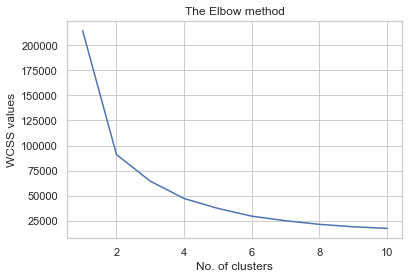

In [122]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS values')
plt.show()

# Model Building using KMeans

In [123]:
# Choose the optimal K value based on the Elbow Method
optimal_k = 4  # Replace with the value you determined from the elbow plot

# Create a KMeans model with the optimal K value
kmeans = KMeans(n_clusters=optimal_k)

# Fit and predict using the scaled dataset
cluster_assignments = kmeans.fit_predict(scaled_df_train)

# Add cluster assignments to the original dataset
df_with_clusters = pd.concat([scaled_df_train, pd.DataFrame({'Cluster': cluster_assignments})], axis=1)
df_with_clusters

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group,Log_Income,Cluster
0,-0.582681,1.068121,0.289987,-0.837768,-0.915618,0.324086,0.986556,1.583097,1.692139,2.510710,...,-0.265155,-0.256791,-0.107763,-0.098279,2.418090,1.485369,1.030138,-1.217707,0.434069,3
1,-0.582681,1.068121,-0.262018,0.994339,0.899412,-0.366686,-0.867103,-0.627657,-0.706863,-0.639881,...,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-1.203385,1.288358,-1.217707,-0.020674,2
2,-0.582681,-0.583569,0.920668,-0.837768,-0.915618,-0.781150,0.365699,0.592069,-0.169309,1.380204,...,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-0.157759,0.341549,-0.373229,0.852166,3
3,-0.582681,-0.583569,-1.183960,0.994339,-0.915618,-0.781150,-0.867103,-0.551425,-0.644667,-0.491618,...,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-1.054010,-1.293848,1.315726,-1.130721,2
4,1.416540,0.242276,0.297241,0.994339,-0.915618,1.567476,-0.385864,0.439603,-0.209292,0.175566,...,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-0.904635,-1.035627,1.315726,0.439409,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,-1.582292,-0.583569,-1.485985,-0.837768,-0.915618,-1.057459,-0.876015,-0.449781,-0.635781,-0.232158,...,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,1.186619,-1.896362,2.160204,-1.686902,2
1564,-0.582681,0.242276,-1.140573,0.994339,-0.915618,-0.124916,-0.751249,-0.271904,-0.244833,0.045836,...,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,0.589118,-0.519186,0.471249,-1.062131,2
1565,2.416151,1.068121,-1.688692,0.994339,-0.915618,-0.781150,-0.896809,-0.627657,-0.715748,-0.473085,...,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,0.140992,-0.863480,0.471249,-2.171092,2
1566,1.416540,0.242276,-0.112246,0.994339,-0.915618,-1.679154,0.015168,-0.653068,-0.409209,-0.676947,...,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,0.738493,-0.605259,0.471249,0.113244,2


In [124]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_df_train, cluster_assignments)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.14979841946024344


In [125]:
# Calculate the inertia
inertia = kmeans.inertia_
print("Inertia (Within-Cluster Sum of Squares(WCSS)):", inertia)

Inertia (Within-Cluster Sum of Squares(WCSS)): 30340.02399790344


In [126]:
scaled_df_train.loc[:, 'Cluster'] = cluster_assignments
scaled_df_train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group,Log_Income,Cluster
0,-0.582681,1.068121,0.289987,-0.837768,-0.915618,0.324086,0.986556,1.583097,1.692139,2.510710,...,-0.265155,-0.256791,-0.107763,-0.098279,2.418090,1.485369,1.030138,-1.217707,0.434069,3
1,-0.582681,1.068121,-0.262018,0.994339,0.899412,-0.366686,-0.867103,-0.627657,-0.706863,-0.639881,...,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-1.203385,1.288358,-1.217707,-0.020674,2
2,-0.582681,-0.583569,0.920668,-0.837768,-0.915618,-0.781150,0.365699,0.592069,-0.169309,1.380204,...,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-0.157759,0.341549,-0.373229,0.852166,3
3,-0.582681,-0.583569,-1.183960,0.994339,-0.915618,-0.781150,-0.867103,-0.551425,-0.644667,-0.491618,...,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-1.054010,-1.293848,1.315726,-1.130721,2
4,1.416540,0.242276,0.297241,0.994339,-0.915618,1.567476,-0.385864,0.439603,-0.209292,0.175566,...,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-0.904635,-1.035627,1.315726,0.439409,2


In [127]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(scaled_df_train, cluster_assignments)
silhouette_avg

0.16883247763981235

## Visualizing the clustered dataframe

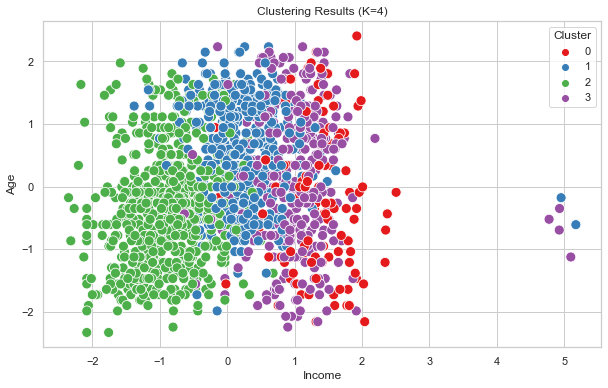

In [128]:
# Visualize the clustered data
plt.figure(figsize=(10, 6))

sns.scatterplot(data=scaled_df_train, x='Income', y='Age', hue='Cluster', palette='Set1', s=100)
plt.title('Clustering Results (K={})'.format(optimal_k))

plt.show()

<AxesSubplot:xlabel='Cluster', ylabel='count'>

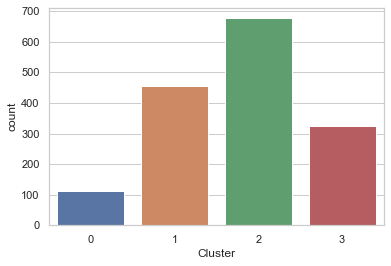

In [129]:
sns.countplot(x='Cluster', data=df_with_clusters)

# Saving the kmeans clustering model and the data with cluster label

In [ ]:
from joblib import dump

# Save the KMeans model to a file
model_filename = 'CA_kmeans_model.joblib'
dump(kmeans, model_filename)

In [ ]:
# Specify the CSV file name
csv_filename = 'Clustered_CustomerAnalysis_Data.csv'

# Save the DataFrame to a CSV file
df_with_clusters.to_csv(csv_filename, index=False)

# Predicting new data

In [134]:
new_data = test_data.copy()
new_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Cst_tenure_months,Age,Age_Group,Log_Income
0,1,0,38232000.0,1,1,84,43000,5000,28000,7000,...,0,0,0,0,0,0,118,52,1970,17.459183
1,3,4,22554000.0,1,1,38,27000,0,10000,0,...,0,0,0,0,0,0,132,68,1950,16.931423
2,3,4,23536000.0,1,0,53,6000,0,3000,0,...,0,0,0,0,0,0,113,40,1980,16.974042
3,1,4,49413000.0,0,1,88,205000,7000,41000,3000,...,0,0,0,0,0,0,121,71,1950,17.715724
4,1,4,42231000.0,1,1,99,24000,0,8000,0,...,0,0,0,0,0,0,115,54,1960,17.558665


In [135]:
new_data1 = new_data.values

In [136]:
model.predict(new_data1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [137]:
new_data['Predicted_class'] = model.predict(new_data1)
new_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Cst_tenure_months,Age,Age_Group,Log_Income,Predicted_class
0,1,0,38232000.0,1,1,84,43000,5000,28000,7000,...,0,0,0,0,0,118,52,1970,17.459183,0
1,3,4,22554000.0,1,1,38,27000,0,10000,0,...,0,0,0,0,0,132,68,1950,16.931423,0
2,3,4,23536000.0,1,0,53,6000,0,3000,0,...,0,0,0,0,0,113,40,1980,16.974042,0
3,1,4,49413000.0,0,1,88,205000,7000,41000,3000,...,0,0,0,0,0,121,71,1950,17.715724,0
4,1,4,42231000.0,1,1,99,24000,0,8000,0,...,0,0,0,0,0,115,54,1960,17.558665,0


In [138]:
from sklearn.manifold import TSNE

tsne1 = TSNE(n_components=2, perplexity=35, n_iter=300, random_state=42)
new_data_tsne = tsne.fit_transform(new_data)
    
new_data_tsne

array([[  5.0208187,   3.9792564],
       [ -5.0903687,  15.619789 ],
       [ -4.268014 ,  15.341222 ],
       ...,
       [  9.213552 ,  -8.214298 ],
       [ -3.3691623, -12.37696  ],
       [ 12.708132 ,  -3.9986484]], dtype=float32)

In [139]:
new_data_tsne = pd.DataFrame(data=new_data_tsne, columns=['component 1', 'component 2'])
new_data_tsne.head()

,component 1,component 2
0,5.020819,3.979256
1,-5.090369,15.619789
2,-4.268014,15.341222
3,14.165061,-0.135524
4,9.891246,5.643956


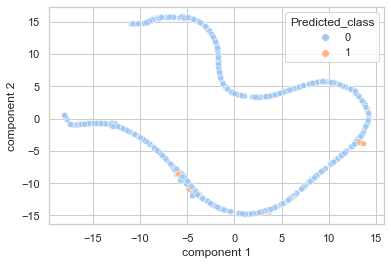

In [140]:
sns.scatterplot(x=new_data_tsne['component 1'], 
                y=new_data_tsne['component 2'], 
                hue=new_data['Predicted_class'],
               palette='pastel')
plt.show()